In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
data=pd.read_csv('train.csv')
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [83]:
data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [86]:
data['Transported']=data['Transported'].map({False:0,True:1})

In [87]:
X_train=data.drop(['PassengerId','Transported','Name'],axis=1)
y_train=data[['Transported']]

In [88]:
X_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0


In [89]:
y_train

,Transported
0,0
1,1
2,0
3,0
4,1
...,...
8688,0
8689,0
8690,1
8691,0


In [90]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
dtypes: float64(6), object(5)
memory usage: 747.2+ KB


In [91]:
categorical_columns=[]
numerical_columns=[]
for column in X_train.columns:
    if X_train[column].dtype=='object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)
print(categorical_columns,numerical_columns)
        

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP'] ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [92]:
for column in categorical_columns:
    if X_train[column].isna().sum()>0:
        print(column,X_train[column].unique())

HomePlanet ['Europa' 'Earth' 'Mars' nan]
CryoSleep [False True nan]
Cabin ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
VIP [False True nan]


In [93]:
for column in numerical_columns:
    if X_train[column].isna().sum()>0:
        print(column,data[column].unique())

Age [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
RoomService [   0.  109.   43. ... 1569. 8586.  745.]
FoodCourt [   0.    9. 3576. ... 3208. 6819. 4688.]
ShoppingMall [   0.   25.  371. ... 1085.  510. 1872.]
Spa [   0.  549. 6715. ... 2868. 1107. 1643.]
VRDeck [   0.   44.   49. ... 1164.  971. 3235.]


In [94]:
import seaborn as sns

C:\Users\mahap\AppData\Local\Temp\ipykernel_29172\1116498793.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column],kde=True)


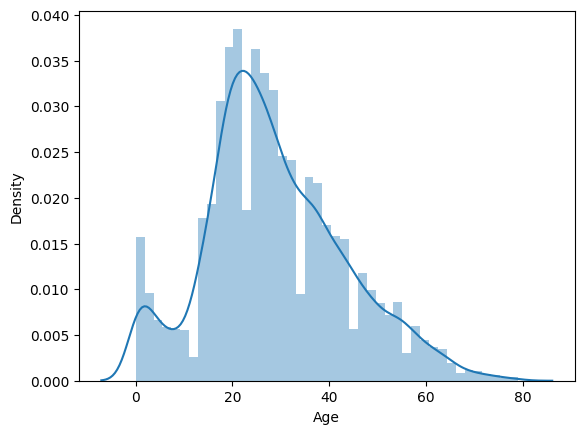

C:\Users\mahap\AppData\Local\Temp\ipykernel_29172\1116498793.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column],kde=True)


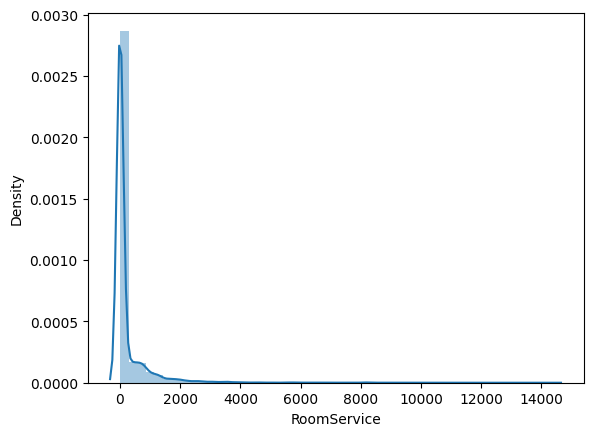

C:\Users\mahap\AppData\Local\Temp\ipykernel_29172\1116498793.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column],kde=True)


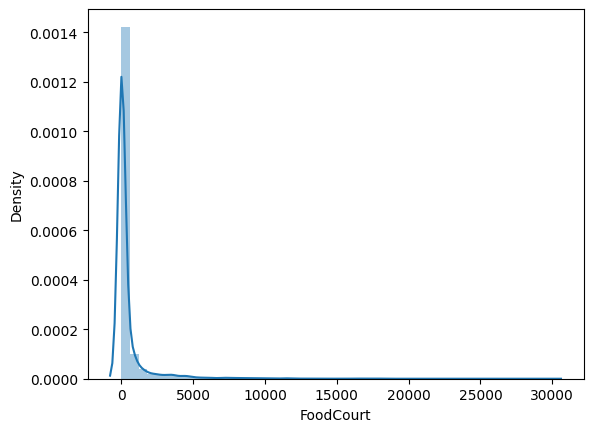

C:\Users\mahap\AppData\Local\Temp\ipykernel_29172\1116498793.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column],kde=True)


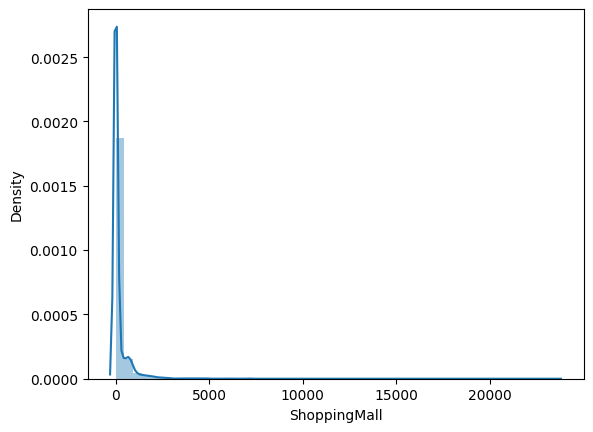

C:\Users\mahap\AppData\Local\Temp\ipykernel_29172\1116498793.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column],kde=True)


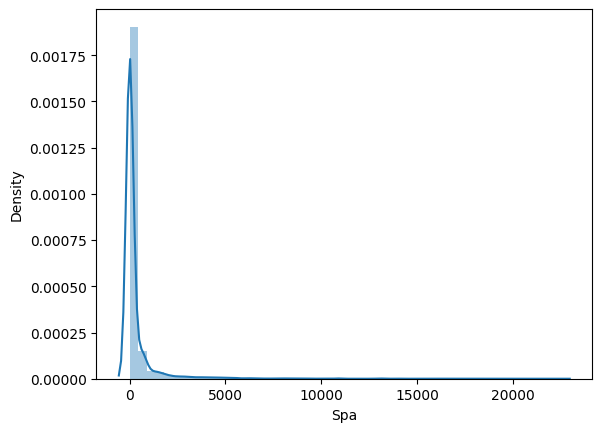

C:\Users\mahap\AppData\Local\Temp\ipykernel_29172\1116498793.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column],kde=True)


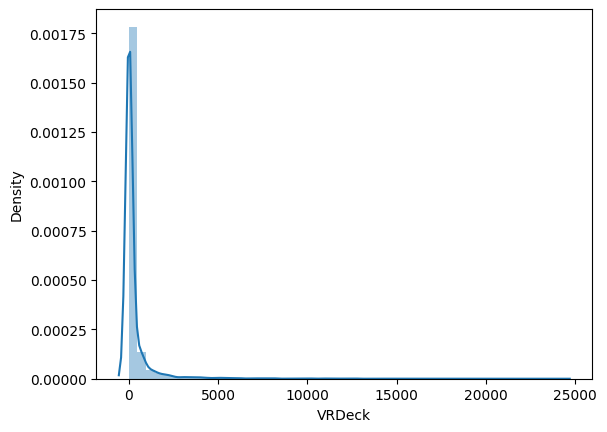

In [95]:
for column in numerical_columns:
    plt.figure()
    sns.distplot(X_train[column],kde=True)
    plt.show()

In [96]:
for column in numerical_columns:
    if(X_train[column].isna().sum()>0):
        X_train[column]=X_train[column].fillna(X_train[column].median())

In [97]:
for column in categorical_columns:
    if X_train[column].isna().sum()>0:
        X_train[column]=X_train[column].fillna(X_train[column].mode()[0])

C:\Users\mahap\AppData\Local\Temp\ipykernel_29172\2170911431.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train[column]=X_train[column].fillna(X_train[column].mode()[0])


In [98]:
X_train.isna().values.any()

False

In [99]:
import category_encoders as ce 
encoder=ce.TargetEncoder(cols=categorical_columns)
scaler=StandardScaler()

In [100]:
X_train=encoder.fit_transform(X_train,y_train)
X_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.658846,0.335042,0.438098,0.472199,39.0,0.506475,0.0,0.0,0.0,0.0,0.0
1,0.427649,0.335042,0.568206,0.472199,24.0,0.506475,109.0,9.0,25.0,549.0,44.0
2,0.658846,0.335042,0.432184,0.472199,58.0,0.381910,43.0,3576.0,0.0,6715.0,49.0
3,0.658846,0.335042,0.432184,0.472199,33.0,0.506475,0.0,1283.0,371.0,3329.0,193.0
4,0.427649,0.335042,0.568206,0.472199,16.0,0.506475,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
8688,0.658846,0.335042,0.438098,0.610000,41.0,0.381910,0.0,6819.0,0.0,1643.0,74.0
8689,0.427649,0.817583,0.438098,0.503769,18.0,0.506475,0.0,0.0,0.0,0.0,0.0
8690,0.427649,0.335042,0.568206,0.472199,26.0,0.506475,0.0,0.0,1872.0,1.0,0.0
8691,0.658846,0.335042,0.503110,0.610000,32.0,0.506475,0.0,1049.0,0.0,353.0,3235.0


In [101]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   float64
 1   CryoSleep     8693 non-null   float64
 2   Cabin         8693 non-null   float64
 3   Destination   8693 non-null   float64
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   float64
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
dtypes: float64(11)
memory usage: 747.2 KB


In [102]:
X_train=scaler.fit_transform(X_train)

In [103]:
import pickle
with open('encoder.pkl','wb') as file:
    pickle.dump(encoder,file)
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBRFClassifier

In [105]:
def prediction_model(model):
    model=model()
    model.fit(X_train,y_train)
    pred=model.predict(X_train)
    print(f"The accuracy score on training data for the {model} is {accuracy_score(y_train,pred)}")
    print(confusion_matrix(y_train,pred))
    print(classification_report(y_train,pred))
    

In [106]:
prediction_model(LogisticRegression)

The accuracy score on training data for the LogisticRegression() is 0.9546761762337513
[[4108  207]
 [ 187 4191]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      4315
           1       0.95      0.96      0.96      4378

    accuracy                           0.95      8693
   macro avg       0.95      0.95      0.95      8693
weighted avg       0.95      0.95      0.95      8693



c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
prediction_model(SVC)

c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy score on training data for the SVC() is 0.9604279305188083
[[4116  199]
 [ 145 4233]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4315
           1       0.96      0.97      0.96      4378

    accuracy                           0.96      8693
   macro avg       0.96      0.96      0.96      8693
weighted avg       0.96      0.96      0.96      8693



In [108]:
prediction_model(KNeighborsClassifier)

c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The accuracy score on training data for the KNeighborsClassifier() is 0.9637639480041412
[[4141  174]
 [ 141 4237]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      4315
           1       0.96      0.97      0.96      4378

    accuracy                           0.96      8693
   macro avg       0.96      0.96      0.96      8693
weighted avg       0.96      0.96      0.96      8693



In [109]:
prediction_model(DecisionTreeClassifier)

The accuracy score on training data for the DecisionTreeClassifier() is 0.9945933509720465
[[4303   12]
 [  35 4343]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4315
           1       1.00      0.99      0.99      4378

    accuracy                           0.99      8693
   macro avg       0.99      0.99      0.99      8693
weighted avg       0.99      0.99      0.99      8693



In [110]:
prediction_model(RandomForestClassifier)

c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The accuracy score on training data for the RandomForestClassifier() is 0.9945933509720465
[[4280   35]
 [  12 4366]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4315
           1       0.99      1.00      0.99      4378

    accuracy                           0.99      8693
   macro avg       0.99      0.99      0.99      8693
weighted avg       0.99      0.99      0.99      8693



In [111]:
prediction_model(AdaBoostClassifier)

c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score on training data for the AdaBoostClassifier() is 0.9612331761187162
[[4120  195]
 [ 142 4236]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4315
           1       0.96      0.97      0.96      4378

    accuracy                           0.96      8693
   macro avg       0.96      0.96      0.96      8693
weighted avg       0.96      0.96      0.96      8693



In [112]:
prediction_model(GradientBoostingClassifier)

c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy score on training data for the GradientBoostingClassifier() is 0.9658345795467618
[[4148  167]
 [ 130 4248]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4315
           1       0.96      0.97      0.97      4378

    accuracy                           0.97      8693
   macro avg       0.97      0.97      0.97      8693
weighted avg       0.97      0.97      0.97      8693



In [113]:
prediction_model(XGBRFClassifier)

The accuracy score on training data for the XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...) is 0.962728632232831
[[4129  186]
 [ 138 4240]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      4315
 

In [114]:
model=RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
}
param_grid
from sklearn.model_selection import RandomizedSearchCV


In [115]:
cv=StratifiedKFold()
randomcv=RandomizedSearchCV(estimator=model,param_distributions=param_grid,scoring='accuracy',cv=cv)
randomcv.fit(X_train,y_train)

c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\mahap\OneDrive\Desktop\C++,JS pyth

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200, 300, 500]},
                   scoring='accuracy')

In [116]:
randomcv.best_params_

{'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': None}

In [117]:
randomcv.best_estimator_

RandomForestClassifier(n_estimators=300)

In [118]:
randomcv.best_score_

0.9572060712378514

In [119]:
pred=randomcv.predict(X_train)
print(accuracy_score(y_train,pred))
print(confusion_matrix(y_train,pred))
print(classification_report(y_train,pred))

0.9945933509720465
[[4280   35]
 [  12 4366]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4315
           1       0.99      1.00      0.99      4378

    accuracy                           0.99      8693
   macro avg       0.99      0.99      0.99      8693
weighted avg       0.99      0.99      0.99      8693



In [120]:
with open('model.pkl','wb') as file:
    pickle.dump(randomcv,file)